In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib
import seaborn as sns



# Data Preprocessing

In [29]:
# Load data
data = pd.read_csv('lending_data.csv')

In [30]:
print(data.isnull().sum())

# Total missing values

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64


In [31]:
# adding  Feature loan to income ratio
data['loan_to_income_ratio'] = data['loan_size'] / data['borrower_income']

In [32]:
print(data.head())

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  loan_to_income_ratio  
0                 1       22800            0              0.202652  
1                 0       13600            0              0.192661  
2                 0       16100            0              0.195228  
3                 1       22700            0              0.203036  
4                 1       23000            0              0.203774  


In [33]:
# Define features and target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [35]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Modeling

In [36]:

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}


In [37]:

# Dictionary to store evaluation metrics
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC-AUC': [],
    'Cross-Val ROC-AUC': []
}

# Plot setup for ROC curves
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [23]:

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, scoring='roc_auc', cv=5)

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['ROC-AUC'].append(roc_auc)
    results['Cross-Val ROC-AUC'].append(cv_scores.mean())

    # Print evaluation metrics
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Cross-Val ROC-AUC (mean): {cv_scores.mean():.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))




Results for Logistic Regression:
Accuracy: 0.9946
Precision: 0.8681
Recall: 0.9827
ROC-AUC: 0.9971
Cross-Val ROC-AUC (mean): 0.9941

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.98      0.92       750

    accuracy                           0.99     23261
   macro avg       0.93      0.99      0.96     23261
weighted avg       1.00      0.99      0.99     23261


Results for Random Forest:
Accuracy: 0.9924
Precision: 0.8737
Recall: 0.8947
ROC-AUC: 0.9970
Cross-Val ROC-AUC (mean): 0.9936

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.89      0.88       750

    accuracy                           0.99     23261
   macro avg       0.94      0.95      0.94     23261
weighted avg       0.99      0.99      0.99     23261


Results for SVM:
Accuracy: 0.9947
Pre

In [24]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Credit Risk Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('roc_curves.png')
plt.close()

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Save the best model (based on ROC-AUC)
best_model_name = results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']
best_model = models[best_model_name]
joblib.dump(best_model, 'best_credit_risk_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"\nBest model ({best_model_name}) and scaler saved as 'best_credit_risk_model.pkl' and 'scaler.pkl'")


Model Comparison:
                 Model  Accuracy  Precision    Recall   ROC-AUC  \
0  Logistic Regression  0.994626   0.868080  0.982667  0.997126   
1        Random Forest  0.992434   0.873698  0.894667  0.996976   
2                  SVM  0.994712   0.868390  0.985333  0.997070   

   Cross-Val ROC-AUC  
0           0.994067  
1           0.993564  
2           0.994088  

Best model (Logistic Regression) and scaler saved as 'best_credit_risk_model.pkl' and 'scaler.pkl'


# Data visualization

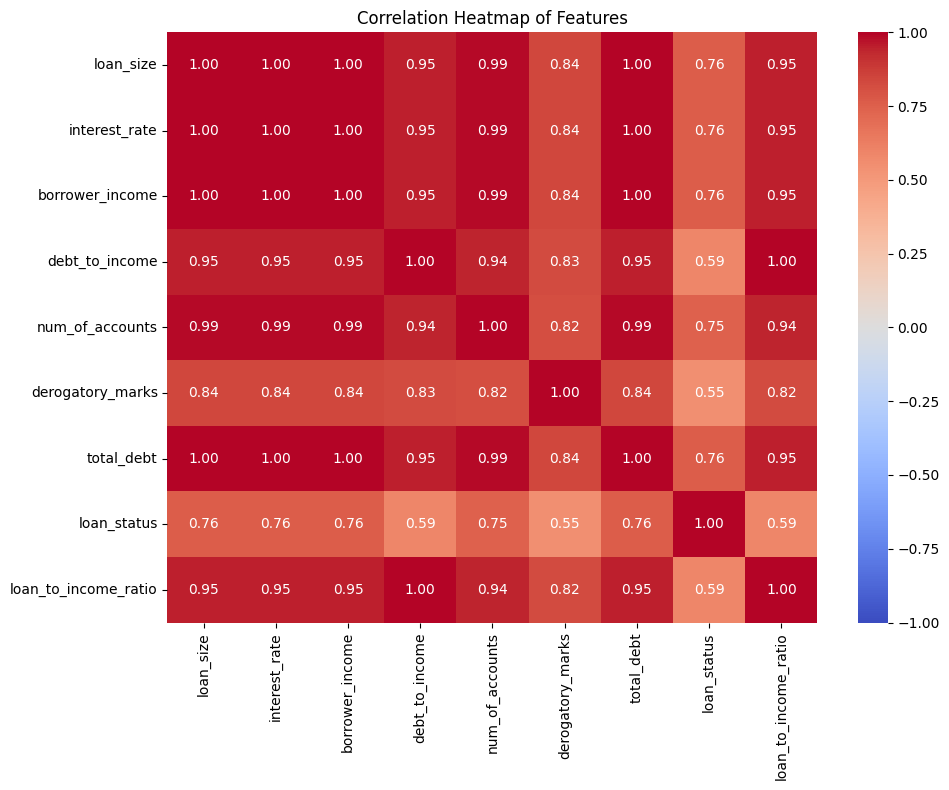

In [26]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()
plt.close()

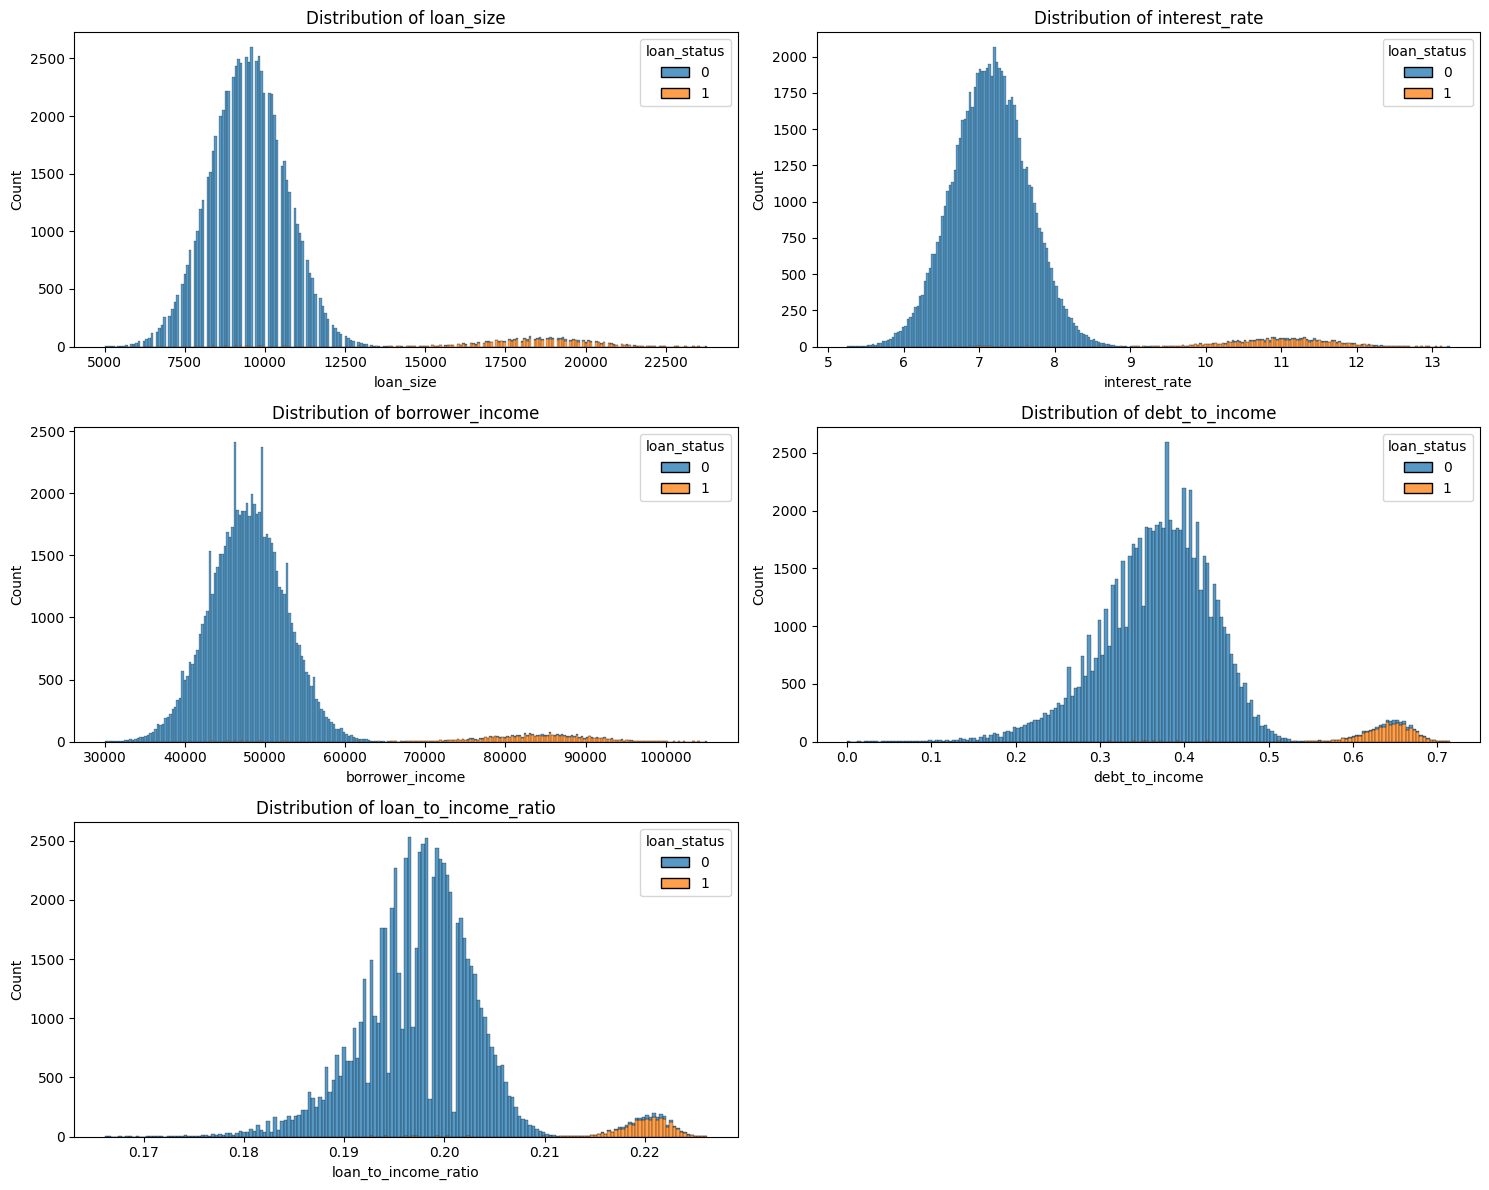

In [25]:

# 2. Feature Distributions (Histograms)
key_features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'loan_to_income_ratio']
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()
for i, feature in enumerate(key_features):
    sns.histplot(data=data, x=feature, hue='loan_status', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
if len(key_features) < len(axes):
    fig.delaxes(axes[-1])
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()
plt.close()

#Project Best Model

<ipython-input-27-24d0d572ebe9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='husl')


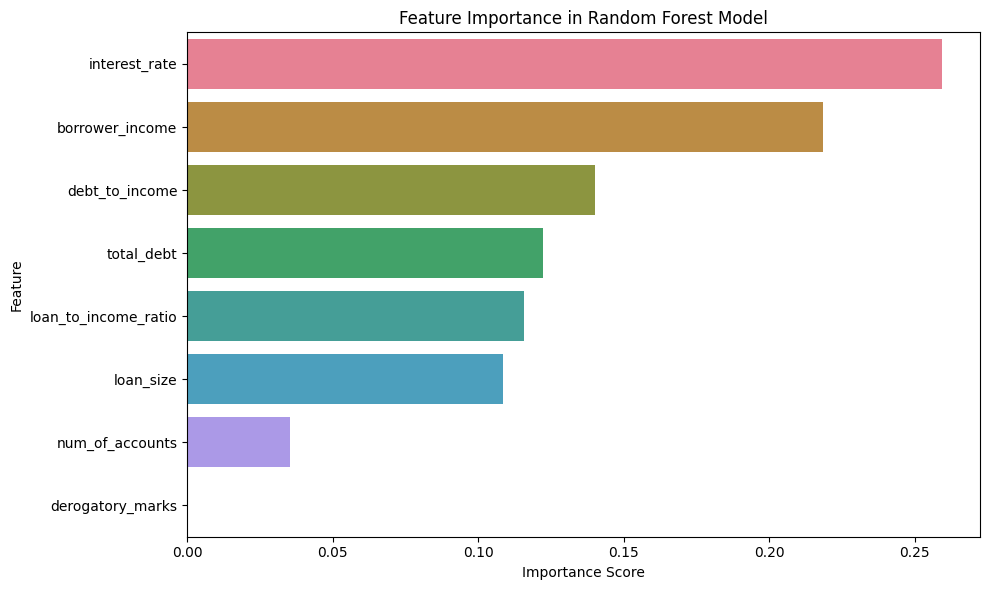


Feature Importance Ranking:
                Feature  Importance
1         interest_rate    0.259463
2       borrower_income    0.218494
3        debt_to_income    0.140135
6            total_debt    0.122223
7  loan_to_income_ratio    0.115683
0             loan_size    0.108515
4       num_of_accounts    0.035389
5      derogatory_marks    0.000098


In [27]:
# Feature Importance Bar Plot (using Random Forest)
plt.figure(figsize=(10, 6))

# Get feature importance from Random Forest model
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_names = X.columns  # Feature names from the original DataFrame

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='husl')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance_rf.png')
plt.show()
plt.close()

print("\nFeature Importance Ranking:")
print(feature_importance_df)